In [28]:
import pandas as pd
import numpy as np

In [29]:
airline_data = pd.read_csv(r"C:\Users\phani\OneDrive\Trainings\IP Training AI\AI and Deep Learning using TensorFLow\Module 6\In-Class Demo\airline-passengers.csv")

In [30]:
airline_data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [31]:
airline_data = airline_data["Passengers"].values

In [32]:
airline_data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

### Data Preparation

In [33]:
def create_data(data, timeperiod):
    X = []
    y = []
    for i in range(len(data)-timeperiod):
        X.append(data[i:(i+timeperiod)])
        y.append(data[i+timeperiod])
    return X,y

In [34]:
X, y = create_data(airline_data, timeperiod=1)

In [35]:
y

[118,
 132,
 129,
 121,
 135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306,
 315,
 301,
 356,
 348,
 355,
 422,
 465,
 467,
 404,
 347,
 305,
 336,
 340,
 318,
 362,
 348,
 363,
 435,
 491,
 505,
 404,
 359,
 310,
 337,
 360,
 342,
 406,
 396,
 420,
 472,
 548,
 559,
 463,
 407,
 362,
 405,
 417,
 391,
 419,
 461,
 472,
 535,
 622,
 606,
 508,
 461,
 390,
 432]

In [36]:
X[0].shape

(1,)

In [37]:
X[0]

array([112], dtype=int64)

In [38]:
y[0]

118

In [39]:
X = np.array(X)
y = np.array(y)

### Train Test Split

In [40]:
train_size = 0.7
cut = round(train_size*len(X)) # Gives the index to slice the train and test datasets

In [41]:
X_train = X[:cut].reshape(-1,1,1)
y_train = y[:cut]

X_test = X[cut:].reshape(-1,1,1)
y_test = y[cut:]

In [46]:
X[0].shape

(1,)

In [22]:
X_train[-1]

array([[348]], dtype=int64)

In [23]:
y_train[-1]

355

### Model Building

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from tensorflow.keras.optimizers import Adam

c:\Users\phani\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, activation="relu", input_shape=(1,1))) # RNN layer
# model.add(LSTM(5, activation="relu", input_shape=(1,1))) # LSTM layer
model.add(Dense(1)) # Output (no activation)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.3), loss="mean_squared_error")

In [ ]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size= 10,  validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 2s 61ms/step - loss: 14889.0596 - val_loss: 34841.4414
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 5197.5215 - val_loss: 2716.4966
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 1333.5110 - val_loss: 4676.9551
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 1243.7485 - val_loss: 2911.4229
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 902.0936 - val_loss: 4393.9077
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 672.5352 - val_loss: 2733.5881
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 536.1686 - val_loss: 2732.0071
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 595.7271 - val_loss: 2484.3459
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 573.7985 - val_loss: 2666.2056
Epoch 10/100
10/10 [==============================] - 0s 

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Predictions

In [ ]:
preds = model.predict(X.reshape(-1,1,1))

5/5 [==============================] - 0s 3ms/step


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

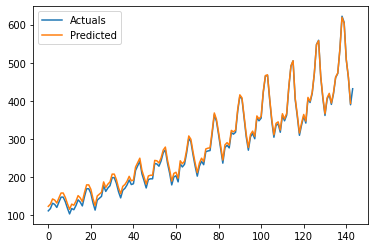

In [ ]:
plt.plot(airline_data)
plt.plot(preds)
plt.legend(["Actuals", "Predicted"])
plt.show()

In [ ]:
input = X[-1]
preds = []
for i in range(10):
    pred = model.predict(input.reshape(1,1,1))
    preds.append(pred)
    input = pred

NameError: name 'X' is not defined